<a href="https://colab.research.google.com/github/sundarjhu/AstrostatsIRyA2023/blob/main/Statistics_For_Astronomers_20231016.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
seed = 10001

# Box plot: comparing magnitude distributions of globular clusters

{'whiskers': [<matplotlib.lines.Line2D at 0x7b9c4ad0ca00>,
 'caps': [<matplotlib.lines.Line2D at 0x7b9c4ad0cf40>,
 'boxes': [<matplotlib.lines.Line2D at 0x7b9c4ad0c760>,
 'medians': [<matplotlib.lines.Line2D at 0x7b9c4ad0d480>,
 'fliers': [<matplotlib.lines.Line2D at 0x7b9c4ad0d720>,
 'means': []}

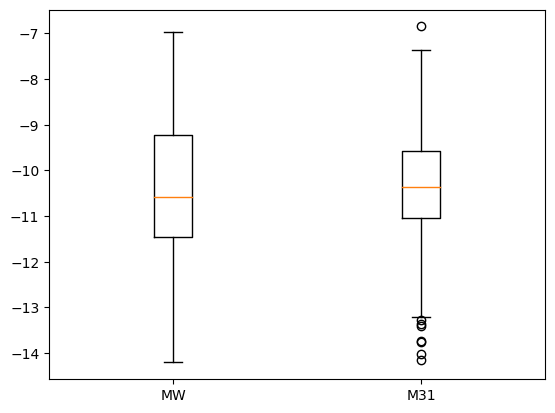

In [9]:
import numpy as np
import matplotlib.pyplot as plt
data1 = np.loadtxt('https://www.irya.unam.mx/gente/s.srinivasan/Teaching/Statistics2023/python/datasets/globular_clusters/MW_GCs.txt')
data2 = np.loadtxt('https://www.irya.unam.mx/gente/s.srinivasan/Teaching/Statistics2023/python/datasets/globular_clusters/M31_GCs.txt')
#M31 magnitudes not corrected for distance!
data2 = data2 - 24.9


plt.boxplot([data1, data2], labels=['MW', 'M31'])#, whis=[2.5, 97.5])#, meanline=True, showmeans=True)

# Histogram: comparing classical and Bayesian binning methods

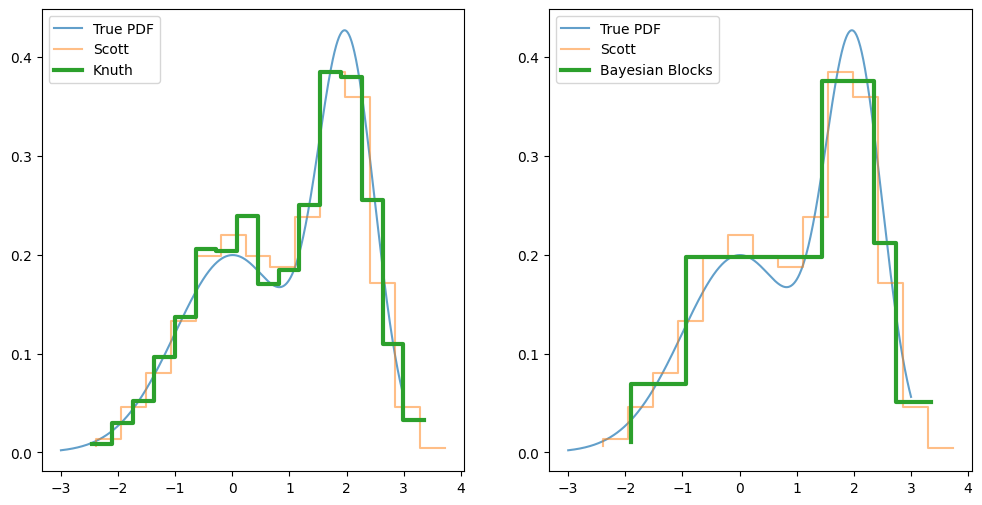

In [ ]:
import numpy as np

#Our data is a mixture of two Gaussians
from scipy.stats import bernoulli, norm
np.random.seed(seed)
p = bernoulli.rvs(0.5, size = 1000)
np.random.seed(seed)
data = p * norm.rvs(size = 1000) + (1 - p) * norm.rvs(loc = 2, scale = 0.5, size = 1000)

#The histograms are computed using the astropy.stats.histogram package
from astropy.stats import histogram
out = histogram(data, bins = 'scott', density = True) #returns a tuple
n_f = out[0]; bin_edges_f = out[1]
out = histogram(data, bins = 'knuth', density = True) #returns a tuple
n_k = out[0]; bin_edges_k = out[1]
out = histogram(data, bins = 'blocks', density = True) #returns a tuple
n_b = out[0]; bin_edges_b = out[1]

from matplotlib import pyplot as plt
x = np.linspace(-3, 3, 1000)
fig, ax = plt.subplots(1, 2, figsize = (12, 6))
_ = ax[0].plot(x, 0.5 * norm.pdf(x) + 0.5 * norm.pdf(x, loc = 2, scale = 0.5), alpha = 0.7, label = 'True PDF')
_ = ax[0].plot(bin_edges_f[1:], n_f, drawstyle = 'steps', alpha = 0.5, label = 'Scott')
_ = ax[0].plot(bin_edges_k[1:], n_k, drawstyle = 'steps', lw = 3, label = 'Knuth')
_ = ax[0].legend(loc = 'best')

_ = ax[1].plot(x, 0.5 * norm.pdf(x) + 0.5 * norm.pdf(x, loc = 2, scale = 0.5), alpha = 0.7, label = 'True PDF')
_ = ax[1].plot(bin_edges_f[1:], n_f, drawstyle = 'steps', alpha = 0.5, label = 'Scott')
_ = ax[1].plot(bin_edges_b[1:], n_b, drawstyle = 'steps', lw = 3, label = 'Bayesian Blocks')
_ = ax[1].legend(loc = 'best')

# Kernel density estimate demo

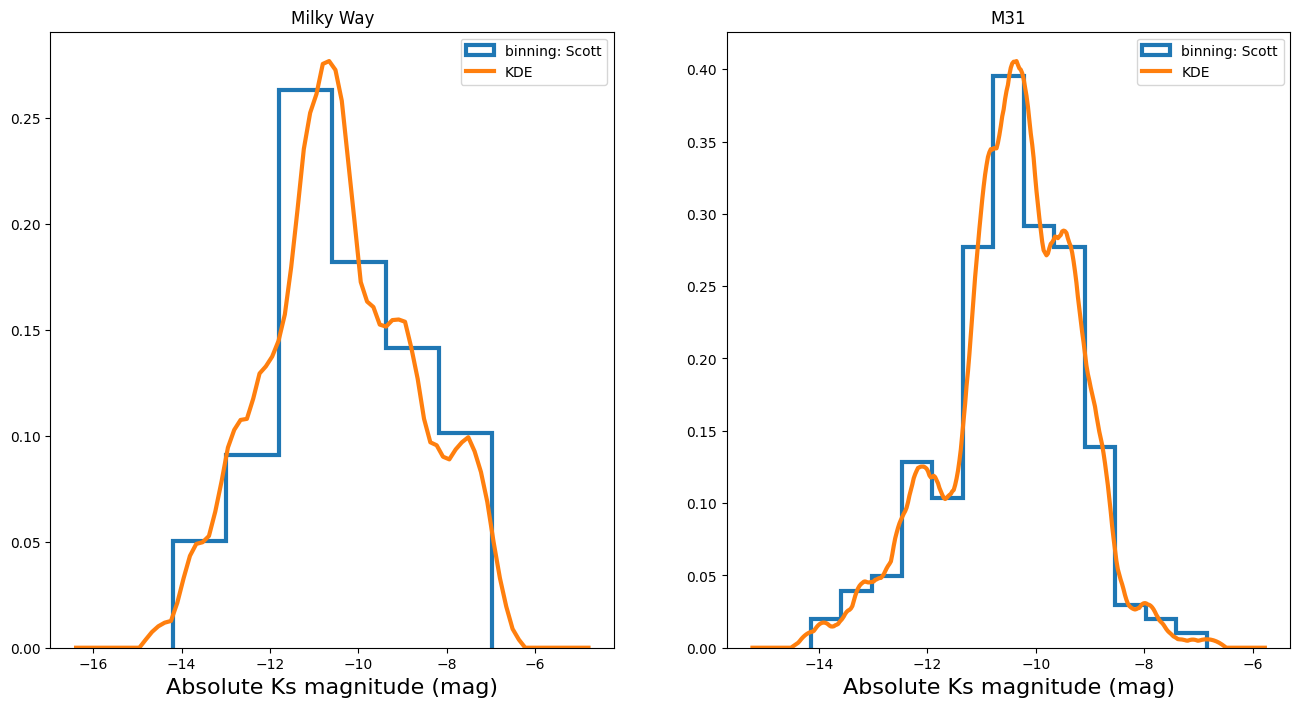

In [ ]:
#Our data set consists of the Ks luminosity functions for Milky Way and M31 globular clusters.
import numpy as np
data1 = np.loadtxt('https://www.irya.unam.mx/gente/s.srinivasan/Teaching/Statistics2023/python/datasets/globular_clusters/MW_GCs.txt')
data2 = np.loadtxt('https://www.irya.unam.mx/gente/s.srinivasan/Teaching/Statistics2023/python/datasets/globular_clusters/M31_GCs.txt')
#M31 magnitudes not corrected for distance!
data2 = data2 - 24.9

#Compute KDEs and compare them to histograms with classical binning
from statsmodels.nonparametric.kde import KDEUnivariate
kde1 = KDEUnivariate(data1)
kde2 = KDEUnivariate(data2)
#We can also specify which method is to be used to compute the bandwidth
#     methods available: 'biw', 'cos', 'epa', 'gau', 'tri', 'triw', 'uni'
kernel = 'epa'
kde1.fit(bw = 'scott', kernel = kernel, fft = False)
kde2.fit(bw = 'scott', kernel = kernel, fft = False)

fig, ax = plt.subplots(1, 2, figsize = (16, 8))
_ = ax[0].hist(data1, bins = 'scott', histtype = 'step', label = 'binning: Scott', density = True, lw = 3)
_ = ax[0].plot(kde1.support, kde1.density, lw = 3, label = 'KDE')
_ = ax[0].set_title('Milky Way')
_ = ax[0].legend(loc = 'best')
_ = ax[0].set_xlabel('Absolute Ks magnitude (mag)', fontdict = {'size': 16})
_ = ax[1].hist(data2, bins = 'scott', histtype = 'step', label = 'binning: Scott', density = True, lw = 3)
_ = ax[1].plot(kde2.support, kde2.density, lw = 3, label = 'KDE')
_ = ax[1].set_title('M31')
_ = ax[1].legend(loc = 'best')
_ = ax[1].set_xlabel('Absolute Ks magnitude (mag)', fontdict = {'size': 16})

In [ ]:
kde1.evaluate(-12)

array([0.13612022])

In [ ]:
data = norm.rvs(size = 10)

In [ ]:
data

array([-0.01434498, -0.11895353, -0.85550402, -1.751542  ,  0.4097061 ,
        1.26347168, -0.96182173, -0.915955  ,  1.51280123, -1.25449004])

In [ ]:
newdata = data[5]
data = np.concatenate([data[0:5], data[6:]])

In [ ]:
data

array([-0.01434498, -0.11895353, -0.85550402, -1.751542  ,  0.4097061 ,
       -0.96182173, -0.915955  ,  1.51280123, -1.25449004])

In [ ]:
newdata

1.2634716834598763

In [ ]:
kde = KDEUnivariate(data)
kde.fit()
kde.evaluate(newdata)

array([0.10380821])

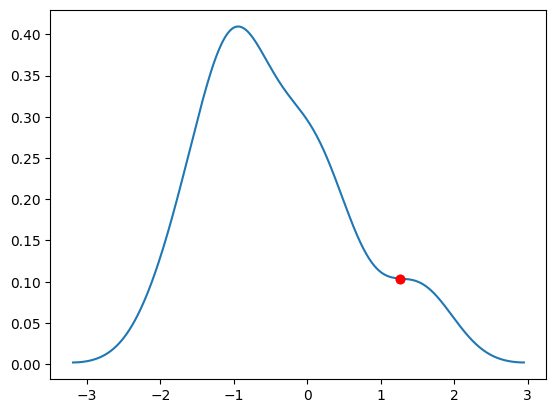

In [ ]:
plt.plot(kde.support, kde.density)
plt.plot([newdata, newdata], [kde.evaluate(newdata), kde.evaluate(newdata)], 'ro', ms = 6)